## **PROBABILITY PROJECT PACMANN AI**
- Worked on by ***Taufik Budi Wibowo***
- Dataset from https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv

*This dataset belongs to a Hackathon organized by "Univ.AI"!!*

| **Column** | **Description** |
|-----------------|-----------------|
| income    | Income of the user    |
| age    | Age of the user    |
| experience    | Professional experience of the user in years    |
| marital_status    | Whether married or single    |
| house_ownership    | Owned or rented or neither    |
| car_ownership    | Does the person own a car    |
| profession    | Profession of the user    |
| city    | City of residence    |
| job_yrs    | Years of experience in the current job    |
| risk_flag    | Defaulted on a loan    |


**Outline**
- Import Library and Setting Connection to Dataset
- Data Cleaning
- Exploratory Data Analysis (EDA):
    - How is the proportion based on its default loan?
    - How are the proportion and distribution between variables with default loans?
    - How is the correlation between variables?
    - How is the insight that we got from hypothesis testing?

**1. Import Library and Setting Connection to Dataset**

In [1]:
#Import the library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from dython import nominal
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#Open and read the datasets
data = pd.read_csv('e:\\Bootcamp Technical\\Project Probability\\Training Data\\Training Data.csv')

In [3]:
#Lowering all the column
columns = [x.lower() for x in list(data.columns)]
data.columns = columns

#Rename the Married/Single name column into Marital Status
data.rename({'married/single':'marital_status',
             'current_job_yrs':'job_yrs',
             'current_house_yrs':'house_yrs'},axis=1,inplace=True)

#Remove unused data
data.drop(['id','state','house_yrs'],axis=1,inplace=True)

#Displaying info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   income           252000 non-null  int64 
 1   age              252000 non-null  int64 
 2   experience       252000 non-null  int64 
 3   marital_status   252000 non-null  object
 4   house_ownership  252000 non-null  object
 5   car_ownership    252000 non-null  object
 6   profession       252000 non-null  object
 7   city             252000 non-null  object
 8   job_yrs          252000 non-null  int64 
 9   risk_flag        252000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 19.2+ MB


**2. Data Cleaning**

In [4]:
#Looking for inconsistency value
columns_check = ['profession', 'city']
for i in columns_check:
    unique_val = data[i].unique()
    print(unique_val)
    

['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamar

In [5]:
#Fix inconsistent value on city column
data['city'] = data['city'].str.replace(r'\[.*\]', '' ,regex=True)

In [6]:
#Checking Null Values
missing = data.isnull().sum()[data.isnull().sum()>0]
missing_val = pd.DataFrame({'NaN_count':missing, 'NaN_percentage':missing/len(data)})
missing_val = missing_val.sort_values(by='NaN_percentage', ascending=False)
missing_val

,NaN_count,NaN_percentage


In [7]:
#Check Outliers
data.describe()

,income,age,experience,job_yrs,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,1.000000


**3. Exploratory Data Analysis (EDA)**

- Display the proportion and distribution based on its default loan

Percentage of Risk Flag with the value is 0 : 87.7%
Percentage of Risk Flag with the value is 1 : 12.3%


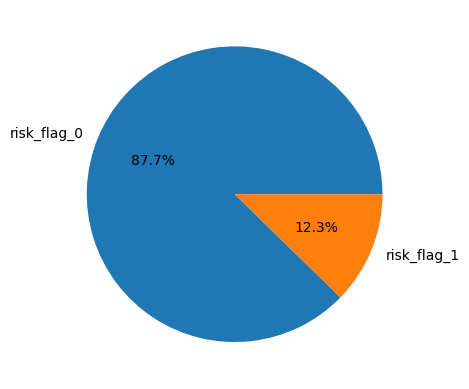

In [8]:
#Distribution of Risk Flag Customer
dist_riskflag0 = data['risk_flag'].value_counts()[0]
dist_riskflag1 = data['risk_flag'].value_counts()[1]
print(f'Percentage of Risk Flag with the value is 0 : {(dist_riskflag0/data.shape[0])*100}%')
print(f'Percentage of Risk Flag with the value is 1 : {(dist_riskflag1/data.shape[0])*100}%')

#Display the percentage in Pie Chart
riskflag_counts = data['risk_flag'].value_counts()
riskflag_index = riskflag_counts.index.tolist()
labels_name = {0:'risk_flag_0', 1:'risk_flag_1'}
labels = [labels_name.get(x, '') for x in riskflag_index]
plt.pie(riskflag_counts, labels=labels, autopct='%1.1f%%')
plt.show()

- How are the proportion between variables with default loans?

        *define the function to assist in coding*

In [9]:
#Show dataset stats
def data_stats(data, x_col, y_col, agg=np.mean, col_list=None):
    print(f'Distribution based on {x_col} \n')
    print(pd.crosstab(data[x_col], data[y_col], margins=True))
    print('-'*50)
    print(f'Proportion based on {x_col} \n')
    print(pd.pivot_table(data=data, index=x_col, values=y_col, aggfunc=agg, columns=col_list, sort=True))

#Show dataset plot among risk flag
def barplot(data, x_col, plt_title):
    filter = data[data['risk_flag']==1]
    dist = filter[x_col].value_counts().sort_values(ascending=False).head(5)
    total = len(filter)
    proba = ((dist.iloc[0]) / total)*100
    print(f'{x_col.title()} yang melakukan loan terbanyak yaitu {dist.head(1).index[0]}, dengan persentase sebesar {proba:.2f}%')

    plt.figure(figsize=(6,4))
    sns.countplot(data=filter, y=x_col, color='orange',order=dist.index)
    plt.title(plt_title)
    plt.xlabel('count')
    plt.ylabel(x_col)
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

In [10]:
def age_range(age):
    if age > 19 and age <= 35:
        return 'youth & adult'
    elif age > 35 and age <= 50:
        return 'middle'
    elif age > 50 and age <= 65 :
        return 'elderly'
    else:
        return 'seniors'

data['age_range'] = data['age'].apply(age_range)
dist_age_range = data['age_range'].value_counts()
print(dist_age_range)

age_range
youth & adult    65726
elderly          63129
middle           62922
seniors          60223
Name: count, dtype: int64


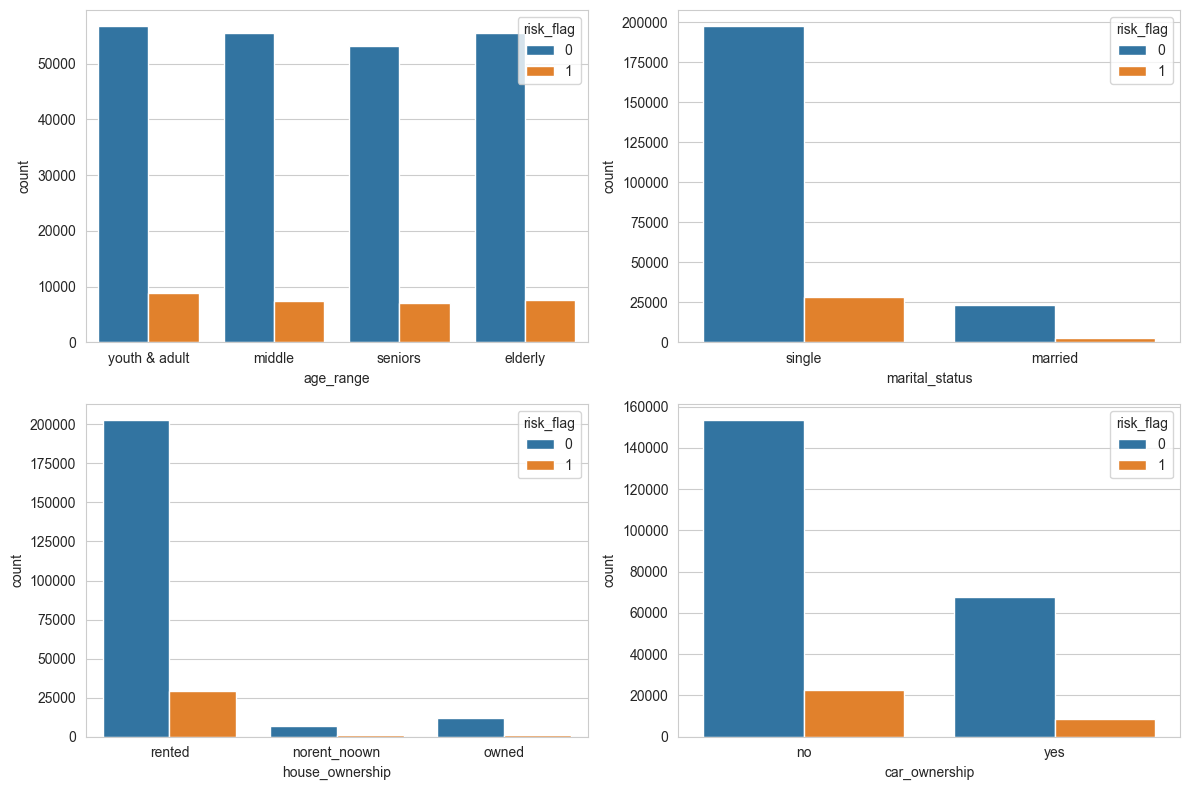

In [34]:
colnames1 = ['age_range','marital_status','house_ownership','car_ownership']

total_colnames = len(colnames1)
num_col = min(total_colnames, 2)
num_rows = math.ceil(total_colnames/num_col)
fig, ax = plt.subplots(num_rows, num_col, figsize=(12, num_rows*4))

cnt = 0

for i in range(num_rows):
    for j in range(num_col):
        cnt = i * num_col + j
        if cnt >= total_colnames:
            break
        sns.countplot(data=data, x=colnames1[cnt], hue='risk_flag', ax=ax[i,j])


fig.tight_layout()
plt.show()

In [12]:
#Conditional Probability on Age Range
proba_ar = data_stats(data, 'age_range', 'risk_flag')

Distribution based on age_range 

risk_flag           0      1     All
age_range                           
elderly         55575   7554   63129
middle          55433   7489   62922
seniors         53203   7020   60223
youth & adult   56793   8933   65726
All            221004  30996  252000
--------------------------------------------------
Proportion based on age_range 

               risk_flag
age_range               
elderly         0.119660
middle          0.119020
seniors         0.116567
youth & adult   0.135913


In [13]:
#Conditional Probability on Age Range
proba_mr = data_stats(data, 'marital_status', 'risk_flag')

Distribution based on marital_status 

risk_flag            0      1     All
marital_status                       
married          23092   2636   25728
single          197912  28360  226272
All             221004  30996  252000
--------------------------------------------------
Proportion based on marital_status 

                risk_flag
marital_status           
married          0.102456
single           0.125336


In [14]:
#Conditional Probability on Age Range
proba_hr = data_stats(data, 'house_ownership', 'risk_flag')

Distribution based on house_ownership 

risk_flag             0      1     All
house_ownership                       
norent_noown       6469    715    7184
owned             11758   1160   12918
rented           202777  29121  231898
All              221004  30996  252000
--------------------------------------------------
Proportion based on house_ownership 

                 risk_flag
house_ownership           
norent_noown      0.099527
owned             0.089797
rented            0.125577


In [15]:
#Conditional Probability on Age Range
proba_cr = data_stats(data, 'car_ownership', 'risk_flag')

Distribution based on car_ownership 

risk_flag           0      1     All
car_ownership                       
no             153439  22561  176000
yes             67565   8435   76000
All            221004  30996  252000
--------------------------------------------------
Proportion based on car_ownership 

               risk_flag
car_ownership           
no              0.128188
yes             0.110987


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


profession
Police_officer            826
Software_Developer        750
Air_traffic_controller    715
Surveyor                  714
Physician                 710
Name: count, dtype: int64
Profession yang melakukan loan terbanyak yaitu Police_officer, dengan persentase sebesar 2.66%


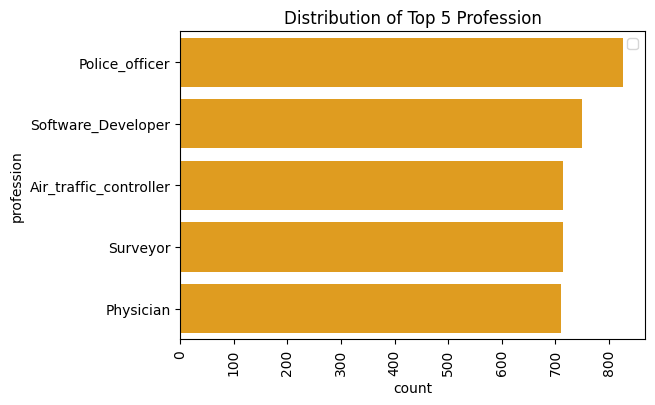

In [16]:
filter_riskflag = data[data['risk_flag']==1]
dist_profession = filter_riskflag['profession'].value_counts().sort_values(ascending=False).head(5)
print(dist_profession)

#Make plot between the Age Range and Risk Flag
barplot(data, x_col='profession', plt_title='Distribution of Top 5 Profession')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


city
Kochi       243
Satna       232
Buxar       228
Srinagar    216
Indore      212
Name: count, dtype: int64
City yang melakukan loan terbanyak yaitu Kochi, dengan persentase sebesar 0.78%


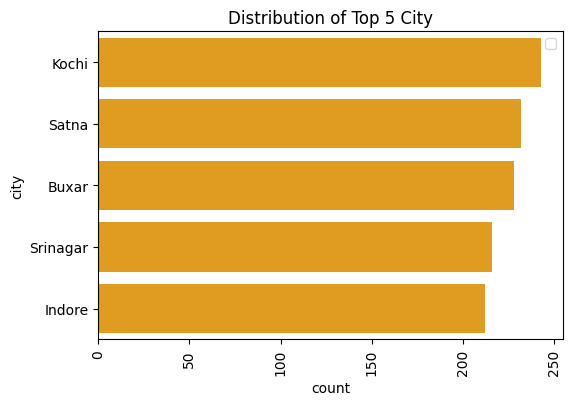

In [17]:
filter_riskflag = data[data['risk_flag']==1]
dist_profession = filter_riskflag['city'].value_counts().sort_values(ascending=False).head(5)
print(dist_profession)

#Make plot between the Age Range and Risk Flag
barplot(data, x_col='city', plt_title='Distribution of Top 5 City')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


experience
2     1890
15    1808
1     1802
16    1600
3     1586
Name: count, dtype: int64
Experience yang melakukan loan terbanyak yaitu 2, dengan persentase sebesar 6.10%


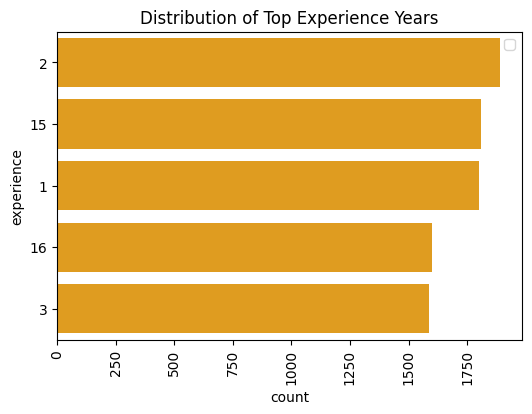

In [18]:
filter_riskflag = data[data['risk_flag']==1]
dist_exp = filter_riskflag['experience'].value_counts().sort_values(ascending=False).head(5)
print(dist_exp)

#Make plot between the Age Range and Risk Flag
barplot(data, x_col='experience', plt_title='Distribution of Top Experience Years')

Average customer income that usually fails to repay the funds according to the initial agreement is $4973036


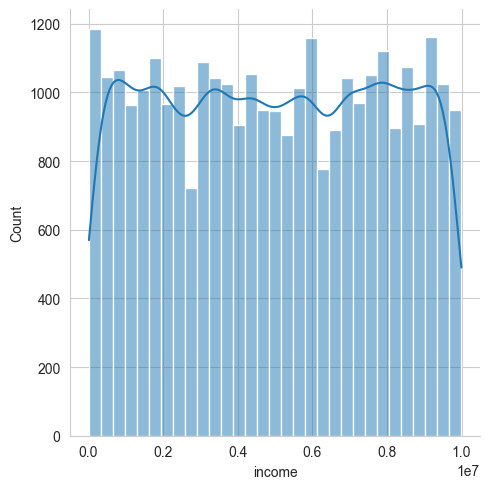

In [35]:
filter = data[data['risk_flag']==1]
sorted_risk_income = np.sort(filter['income'])
n_risk = len(sorted_risk_income)
cumulative_prob_risk = np.arange(1, n_risk + 1) / n_risk

#Calculate the expected value
expected_value = np.sum(sorted_risk_income[:-1] * np.diff(cumulative_prob_risk))
print(f'Average customer income that usually fails to repay the funds according to the initial agreement is ${expected_value:.0f}')

#Distribution plot
sns.displot(filter['income'], kde=True)

- How is the correlation between variables?

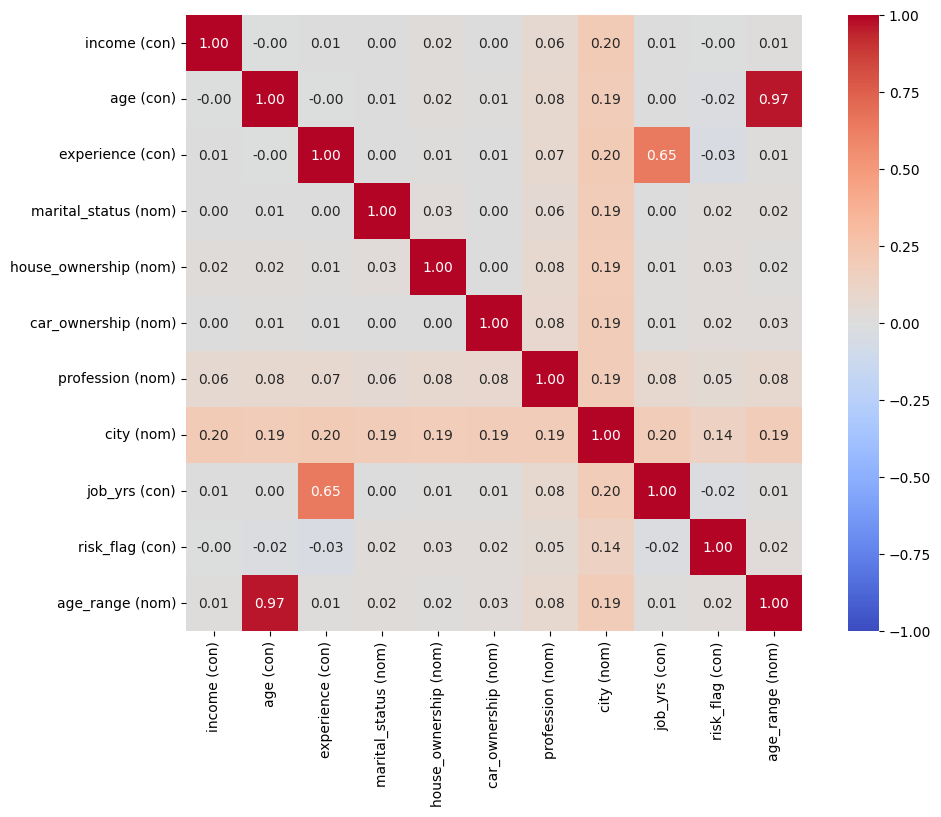

{'corr':                        income (con)  age (con)  experience (con)   
 income (con)               1.000000  -0.000652          0.006422  \
 age (con)                 -0.000652   1.000000         -0.001118   
 experience (con)           0.006422  -0.001118          1.000000   
 marital_status (nom)       0.002682   0.005323          0.001752   
 house_ownership (nom)      0.019824   0.018865          0.014092   
 car_ownership (nom)        0.004068   0.009395          0.007519   
 profession (nom)           0.064937   0.076105          0.072608   
 city (nom)                 0.196069   0.194657          0.201280   
 job_yrs (con)              0.007045   0.002154          0.646098   
 risk_flag (con)           -0.003091  -0.021809         -0.034523   
 age_range (nom)            0.012271   0.968699          0.013022   
 
                        marital_status (nom)  house_ownership (nom)   
 income (con)                       0.002682               0.019824  \
 age (con)          

In [20]:
# https://www.kaggle.com/questions-and-answers/181332
nominal.associations(data,figsize=(12,8), cmap='coolwarm',mark_columns=True)

- How is the decision that we got from this analysis?

C:\Users\62818\AppData\Local\Temp\ipykernel_16396\2925191763.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age_range',y='risk_flag', hue='car_ownership', data=data, ci=None)


Distribution based on age_range 

risk_flag           0      1     All
age_range                           
elderly         55575   7554   63129
middle          55433   7489   62922
seniors         53203   7020   60223
youth & adult   56793   8933   65726
All            221004  30996  252000
--------------------------------------------------
Proportion based on age_range 

car_ownership        no       yes
age_range                        
elderly        0.121219  0.115936
middle         0.125099  0.106115
seniors        0.120728  0.107090
youth & adult  0.144277  0.115103


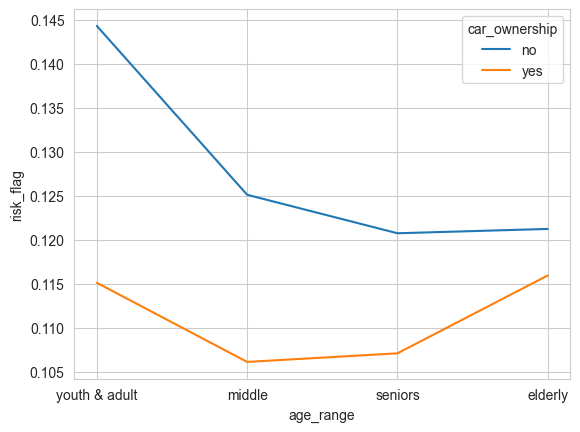

In [21]:
#Plotting
sns.set_style('whitegrid')
sns.lineplot(x='age_range',y='risk_flag', hue='car_ownership', data=data, ci=None)

#Data Stats
data_stats(data, 'age_range', 'risk_flag', col_list='car_ownership')

In [39]:
# Define the conditions for the groups
elderly_age_range = (data['age_range'] == 'elderly')
has_car = (data['car_ownership'] == 'yes')

# Separate the data into two groups based on the conditions
cond1 = data[elderly_age_range & has_car]['risk_flag'] == 1
cond2 = data[~elderly_age_range | ~has_car]['risk_flag'] == 1

# Perform the z-test for two independent proportions
count = np.array([cond1.sum(), cond2.sum()])
nobs = np.array([len(cond1), len(cond2)])
z_score, p_value = proportions_ztest(count, nobs, alternative = 'larger')

# Compare the p-value to the chosen significance level
alpha = 0.05  # Example significance level

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence to support that individuals in the elderly age range with a car are more likely to have a risk flag of 1.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to support that individuals in the elderly age range with a car are more likely to have a risk flag of 1.")

print("Z-score:", z_score)
print("P-value:", p_value)


Fail to reject the null hypothesis
There is not enough evidence to support that individuals in the elderly age range with a car are more likely to have a risk flag of 1.
Z-score: -3.050752958051723
P-value: 0.9988586584683825


C:\Users\62818\AppData\Local\Temp\ipykernel_16396\1200987570.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age_range',y='risk_flag', hue='house_ownership', data=data, ci=None)


Distribution based on age_range 

risk_flag           0      1     All
age_range                           
elderly         55575   7554   63129
middle          55433   7489   62922
seniors         53203   7020   60223
youth & adult   56793   8933   65726
All            221004  30996  252000
--------------------------------------------------
Proportion based on age_range 

house_ownership  norent_noown     owned    rented
age_range                                        
elderly              0.089722  0.075921  0.123305
middle               0.131068  0.106560  0.119322
seniors              0.102804  0.088316  0.118691
youth & adult        0.078732  0.091297  0.139992


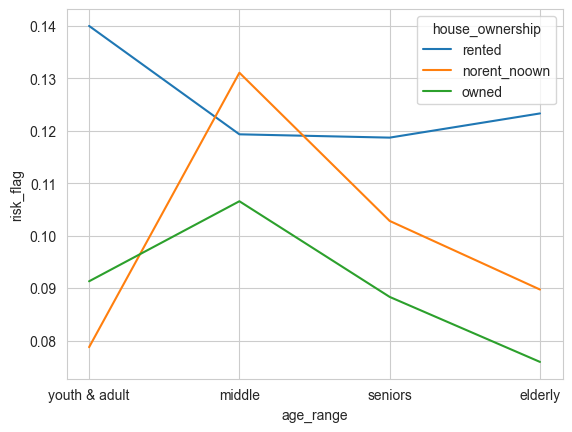

In [23]:
#Plotting
sns.set_style('whitegrid')
sns.lineplot(x='age_range',y='risk_flag', hue='house_ownership', data=data, ci=None)

#Data Stats
data_stats(data, 'age_range', 'risk_flag', col_list='house_ownership')

In [46]:
# Define the conditions for the groups
middle_age_range = (data['age_range'] == 'middle')
nn_house = (data['house_ownership'] == 'norent_noown')

# Separate the data into two groups based on the conditions
cond1 = data[middle_age_range & nn_house]['risk_flag'] == 1
cond2 = data[~middle_age_range | ~nn_house]['risk_flag'] == 1

# Perform the z-test for two independent proportions
count = np.array([cond1.sum(), cond2.sum()])
nobs = np.array([len(cond1), len(cond2)])
z_score, p_value = proportions_ztest(count, nobs, alternative = 'larger')

# Compare the p-value to the chosen significance level
alpha = 0.05  # Example significance level

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence to support that individuals in the middle age range with no rent and no own house are more likely to have a risk flag of 1.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to support that individuals in the middle age range with no rent and no own house are more likely to have a risk flag of 1.")

print("Z-score:", z_score)
print("P-value:", p_value)


Fail to reject the null hypothesis
There is not enough evidence to support that individuals in the middle age range with no rent and no own house are more likely to have a risk flag of 1.
Z-score: 1.0004946902829808
P-value: 0.15853558297262388


C:\Users\62818\AppData\Local\Temp\ipykernel_16396\1598685409.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age_range',y='risk_flag', hue='marital_status', data=data, ci=None)


Distribution based on age_range 

risk_flag           0      1     All
age_range                           
elderly         55575   7554   63129
middle          55433   7489   62922
seniors         53203   7020   60223
youth & adult   56793   8933   65726
All            221004  30996  252000
--------------------------------------------------
Proportion based on age_range 

marital_status   married    single
age_range                         
elderly         0.097104  0.122184
middle          0.100222  0.120953
seniors         0.095086  0.119199
youth & adult   0.116239  0.138233


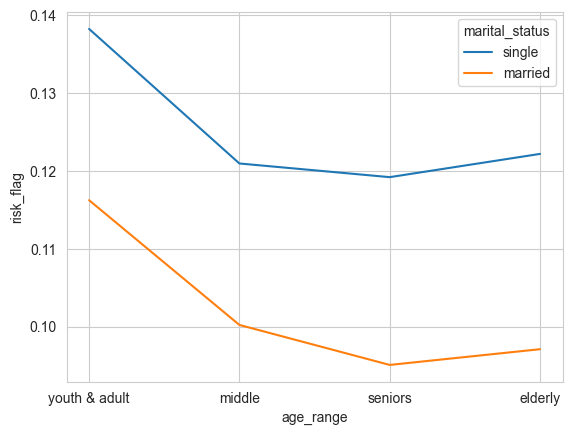

In [25]:
#Plotting
sns.set_style('whitegrid')
sns.lineplot(x='age_range',y='risk_flag', hue='marital_status', data=data, ci=None)

#Data Stats
data_stats(data, 'age_range', 'risk_flag', col_list='marital_status')

In [45]:
# Define the conditions for the groups
ya_age_range = (data['age_range'] == 'youth & adult')
marital_stat = (data['marital_status'] == 'married')

# Separate the data into two groups based on the conditions
cond1 = data[ya_age_range & marital_stat]['risk_flag'] == 1
cond2 = data[~ya_age_range | ~marital_stat]['risk_flag'] == 1

# Perform the z-test for two independent proportions
count = np.array([cond1.sum(), cond2.sum()])
nobs = np.array([len(cond1), len(cond2)])
z_score, p_value = proportions_ztest(count, nobs, alternative = 'larger')

# Compare the p-value to the chosen significance level
alpha = 0.05  # Example significance level

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence to support that individuals in the youth & adult age range also alredy married are more likely to have a risk flag of 1.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to support that individuals in the youth & adult age range also alredy married are more likely to have a risk flag of 1.")

print("Z-score:", z_score)
print("P-value:", p_value)


Fail to reject the null hypothesis
There is not enough evidence to support that individuals in the youth & adult age range also alredy married are more likely to have a risk flag of 1.
Z-score: -1.7382834637381304
P-value: 0.9589195606712508


C:\Users\62818\AppData\Local\Temp\ipykernel_16396\3940605543.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='car_ownership',y='risk_flag', hue='marital_status', data=data, ci=None)


Distribution based on car_ownership 

risk_flag           0      1     All
car_ownership                       
no             153439  22561  176000
yes             67565   8435   76000
All            221004  30996  252000
--------------------------------------------------
Proportion based on car_ownership 

marital_status   married    single
car_ownership                     
no              0.108156  0.130471
yes             0.089154  0.113454


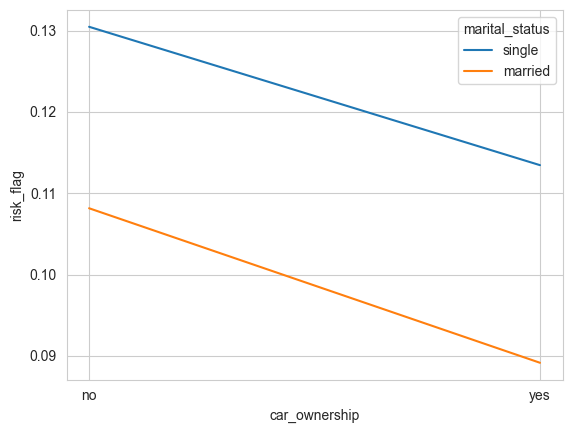

In [27]:
#Plotting
sns.set_style('whitegrid')
sns.lineplot(x='car_ownership',y='risk_flag', hue='marital_status', data=data, ci=None)

#Data Stats
data_stats(data, 'car_ownership', 'risk_flag', col_list='marital_status')

In [42]:
# Define the conditions for the groups
marital_stat = (data['marital_status'] == 'married')
has_car = (data['car_ownership'] == 'no')

# Separate the data into two groups based on the conditions
cond1 = data[marital_stat & has_car]['risk_flag'] == 1
cond2 = data[~marital_stat | ~has_car]['risk_flag'] == 1

# Perform the z-test for two independent proportions
count = np.array([cond1.sum(), cond2.sum()])
nobs = np.array([len(cond1), len(cond2)])
z_score, p_value = proportions_ztest(count, nobs, alternative = 'larger')

# Compare the p-value to the chosen significance level
alpha = 0.05  # Example significance level

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence to support that individuals have alredy married and has no car are more likely to have a risk flag of 1.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to support that individuals have alredy married and has no car are more likely to have a risk flag of 1.")

print("Z-score:", z_score)
print("P-value:", p_value)


Fail to reject the null hypothesis
There is not enough evidence to support that individuals in the middle age range with a car are more likely to have a risk flag of 1.
Z-score: -6.294574034439072
P-value: 0.9999999998458774


C:\Users\62818\AppData\Local\Temp\ipykernel_16396\1982313196.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='house_ownership',y='risk_flag', hue='marital_status', data=data, ci=None)


Distribution based on house_ownership 

risk_flag             0      1     All
house_ownership                       
norent_noown       6469    715    7184
owned             11758   1160   12918
rented           202777  29121  231898
All              221004  30996  252000
--------------------------------------------------
Proportion based on house_ownership 

marital_status    married    single
house_ownership                    
norent_noown     0.060504  0.103051
owned            0.111593  0.088120
rented           0.103139  0.128192


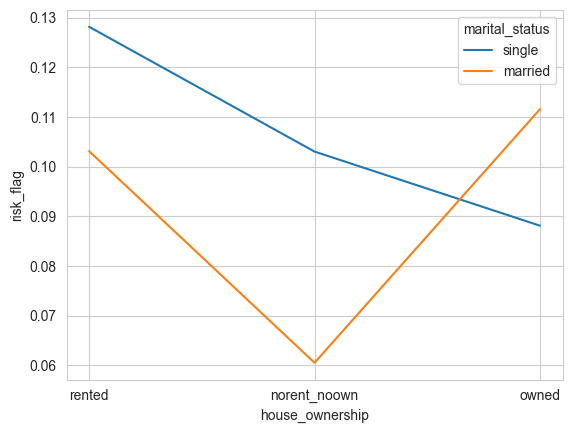

In [29]:
#Plotting
sns.set_style('whitegrid')
sns.lineplot(x='house_ownership',y='risk_flag', hue='marital_status', data=data, ci=None)

#Data Stats
data_stats(data, 'house_ownership', 'risk_flag', col_list='marital_status')

In [47]:
# Define the conditions for the groups
marital_stat = (data['marital_status'] == 'married')
owned_house = (data['house_ownership'] == 'owned')

# Separate the data into two groups based on the conditions
cond1 = data[marital_stat & owned_house]['risk_flag'] == 1
cond2 = data[~marital_stat | ~owned_house]['risk_flag'] == 1

# Perform the z-test for two independent proportions
count = np.array([cond1.sum(), cond2.sum()])
nobs = np.array([len(cond1), len(cond2)])
z_score, p_value = proportions_ztest(count, nobs, alternative = 'larger')

# Compare the p-value to the chosen significance level
alpha = 0.05  # Example significance level

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence to support that individuals have alredy married and have a house are more likely to have a risk flag of 1.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to support that individuals have alredy married and have a house are more likely to have a risk flag of 1.")

print("Z-score:", z_score)
print("P-value:", p_value)


Fail to reject the null hypothesis
There is not enough evidence to support that individuals have alredy married and have a house are more likely to have a risk flag of 1.
Z-score: -1.057135671594385
P-value: 0.8547751633868446
